In [ ]:
!pip install konlpy

     |████████████████████████████████| 19.4 MB 1.3 MB/s 
     |████████████████████████████████| 86 kB 6.1 MB/s 
     |████████████████████████████████| 448 kB 50.2 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 37 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Selecting previously unselected package fonts-nanum.
(Reading database ... 155222 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [ ]:
import pandas as pd
from konlpy.tag import Twitter 

import numpy as np
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/gdriv')

Mounted at /content/gdriv


In [ ]:
import os
print(os.listdir('/content/gdriv/My Drive/Colab Notebooks/data'))

['datasets_19_420_Iris.csv', 'archive.zip', 'car.csv', 'test_car.csv', 'stock.csv', 'test_stock.csv', 'cars_part_quality.csv', 'term_data.csv', 'titanic.csv', 'titanic_term_without_y.csv', 'fine_dust_without_y.csv', 'fine_dust.csv', 'gear', 'BCI.csv', 'bdi.csv', 'News.csv']


In [ ]:
news = pd.read_csv("/content/gdriv/My Drive/Colab Notebooks/data/News.csv", encoding='utf-8')
print(news.columns)

Index(['뉴스식별자', '일자', '언론사', '기고자', '제목', '통합 분류1', '통합 분류2', '통합 분류3',
       '사건/사고 분류1', '사건/사고 분류2', '사건/사고 분류3', '인물', '위치', '기관', '키워드', '특성추출',
       '본문', 'URL', '분석제외 여부'],
      dtype='object')


In [ ]:
news['본문'][0:10]

0    울산·부산지역 중소기업의 이번달 업황전망이 부정적으로 나타났다... .. .. .....
1    2019년 기해(己亥)년은 천간은 음토(陰土)요, 지지는 해수(亥水)다... 천간 ...
2    지난해 북미와 일본 펀드는 높이 날았지만 그만큼 골도 깊었다... 미국과 일본의 경...
3    세계 뒤흔드는 트럼프노믹스 .. ..최소 1년은 상승장 전망 우세..美 실업률 49...
4    [머니투데이 뉴욕(미국)=송정렬 특파원] .. ..유가가 올해 마지막 거래일에 소폭...
5    [머니투데이 변휘 기자] ◆산업은행  <승진> ▷수석부행장 △성주영 ▷부행장(부문장...
6    [머니투데이 뉴욕(미국)=송정렬 특파원] .. ..달러가 약세를 보였다... 하지만...
7    지난해 천당과 지옥을 오갔던 국내 주식시장이 기해년 새해를 맞아 힘찬 도약을 준비하...
8    글로벌 경기 둔화 신호가 글로벌 곳곳에서 나오는 가운데 2019년 기업들의 실적도 ...
9    지난해 유가증권시장에서 3만7180원(227.82%) 올랐다. 12월28일 종가는 ...
Name: 본문, dtype: object

In [ ]:
text = '자연어처리는 컴퓨터가 인간의 언어를 인식하는 분야입니다'

# 꼬꼬마 형태소분석기 사용
from konlpy.tag import Kkma
kkma = Kkma()

print("명사 : ", kkma.nouns(text))    # 명사
print("형태소 : ", kkma.morphs(text))   # 형태소
print("형태소와 품사 : ", kkma.pos(text))      # 형태소와 품사

명사 :  ['자연어', '자연어처리', '처리', '컴퓨터', '인간', '언어', '인식', '분야']
형태소 :  ['자연어', '처리', '는', '컴퓨터', '가', '인간', '의', '언어', '를', '인식', '하', '는', '분야', '이', 'ㅂ니다']
형태소와 품사 :  [('자연어', 'NNG'), ('처리', 'NNG'), ('는', 'JX'), ('컴퓨터', 'NNG'), ('가', 'JKS'), ('인간', 'NNG'), ('의', 'JKG'), ('언어', 'NNG'), ('를', 'JKO'), ('인식', 'NNG'), ('하', 'XSV'), ('는', 'ETD'), ('분야', 'NNG'), ('이', 'VCP'), ('ㅂ니다', 'EFN')]


In [ ]:
# 데이터 전처리 및 토큰화 
hangul = re.compile('[^ ㄱ-ㅣ가-힣]+')
token_list = []
for idx, text in enumerate(news['본문']):
  if idx < 1500:
    print('[Progress: {}/{}]'.format((idx+1),1500))
    result = hangul.sub('', text)
    for token in kkma.pos(result):
      if token[1] == 'NNG':
        if len(token[0])>1:
          token_list.append(token[0])

[Progress: 1/1500]
[Progress: 2/1500]
[Progress: 3/1500]
[Progress: 4/1500]
[Progress: 5/1500]
[Progress: 6/1500]
[Progress: 7/1500]
[Progress: 8/1500]
[Progress: 9/1500]
[Progress: 10/1500]
[Progress: 11/1500]
[Progress: 12/1500]
[Progress: 13/1500]
[Progress: 14/1500]
[Progress: 15/1500]
[Progress: 16/1500]
[Progress: 17/1500]
[Progress: 18/1500]
[Progress: 19/1500]
[Progress: 20/1500]
[Progress: 21/1500]
[Progress: 22/1500]
[Progress: 23/1500]
[Progress: 24/1500]
[Progress: 25/1500]
[Progress: 26/1500]
[Progress: 27/1500]
[Progress: 28/1500]
[Progress: 29/1500]
[Progress: 30/1500]
[Progress: 31/1500]
[Progress: 32/1500]
[Progress: 33/1500]
[Progress: 34/1500]
[Progress: 35/1500]
[Progress: 36/1500]
[Progress: 37/1500]
[Progress: 38/1500]
[Progress: 39/1500]
[Progress: 40/1500]
[Progress: 41/1500]
[Progress: 42/1500]
[Progress: 43/1500]
[Progress: 44/1500]
[Progress: 45/1500]
[Progress: 46/1500]
[Progress: 47/1500]
[Progress: 48/1500]
[Progress: 49/1500]
[Progress: 50/1500]
[Progress

In [ ]:
# 결과확인
token_list[0:20]

['울산',
 '부산',
 '지역',
 '중소기업',
 '이번',
 '전망',
 '부정적',
 '중소기업',
 '중앙회',
 '부산',
 '울산',
 '본부',
 '지역',
 '중소기업',
 '개사',
 '대상',
 '중소기업',
 '경기',
 '전망',
 '조사']

In [ ]:
dt_token_list = pd.DataFrame(token_list)[0].value_counts()
dt_token_list

체결      1448
매수      1009
거래       922
매도       823
상승       510
        ... 
프라이빗       1
사안         1
오형         1
하자         1
주재         1
Name: 0, Length: 3148, dtype: int64

In [ ]:
# dict 형태로 변환하기
word = dict()
for i in range(len(dt_token_list)):
  word.update({list(dt_token_list.index)[i]:dt_token_list.iloc[0]})
print(word)

{'체결': 1448, '매수': 1448, '거래': 1448, '매도': 1448, '상승': 1448, '거래량': 1448, '투자': 1448, '강도': 1448, '대비': 1448, '오전': 1448, '시장': 1448, '오후': 1448, '주가': 1448, '증권': 1448, '현재': 1448, '금융': 1448, '거래일': 1448, '강세': 1448, '기자': 1448, '기록': 1448, '하락': 1448, '잔량': 1448, '지난해': 1448, '주식': 1448, '유지': 1448, '코스': 1448, '지수': 1448, '전일': 1448, '올해': 1448, '회전율': 1448, '대금': 1448, '증시': 1448, '개장': 1448, '지분': 1448, '변동': 1448, '코스닥': 1448, '거래소': 1448, '전망': 1448, '반전': 1448, '증가': 1448, '종목': 1448, '흐름': 1448, '기업': 1448, '경기': 1448, '경제': 1448, '외국인': 1448, '기관': 1448, '국내': 1448, '포인트': 1448, '우위': 1448, '투자자': 1448, '새해': 1448, '본부장': 1448, '시각': 1448, '최근': 1448, '분기': 1448, '공시': 1448, '보고': 1448, '이번': 1448, '실적': 1448, '관계자': 1448, '급증': 1448, '이후': 1448, '분전': 1448, '발표': 1448, '개인': 1448, '이상': 1448, '직전': 1448, '업종': 1448, '투데이': 1448, '주주': 1448, '기준': 1448, '머니': 1448, '마감': 1448, '상장': 1448, '주요': 1448, '자산': 1448, '한국': 1448, '최대': 1448, '서울': 1448, '이날': 1448, '매매': 1448, '한때

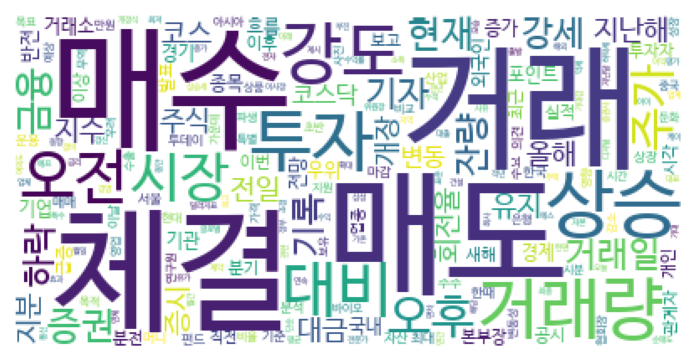

In [ ]:
# word cloud 만들기
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud(font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',background_color='white').generate_from_frequencies(word) 

plt.imshow(wordcloud) 
plt.axis('off') 
plt.show()

In [ ]:
def google_authenticate():
  # Authenticate first so the Google Drive library can detect your credentials.
  from google.colab import auth
  auth.authenticate_user()

  from googleapiclient.discovery import build
  drive_service = build('drive', 'v3')
  return drive_service

In [ ]:
drive_service = google_authenticate()

In [ ]:
def read_file(file_id):

  
  file_id = file_id

  import io
  from googleapiclient.http import MediaIoBaseDownload

  request = drive_service.files().get_media(fileId=file_id)
  downloaded = io.BytesIO()
  downloader = MediaIoBaseDownload(downloaded, request)
  done = False
  while done is False:
    _, done = downloader.next_chunk()

  downloaded.seek(0)
  return downloaded

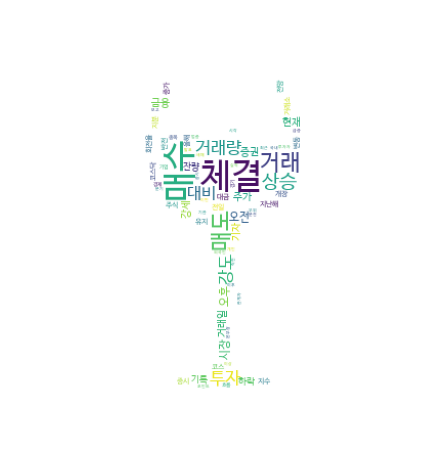

In [ ]:
from PIL import Image

# create mask
image = "/content/gdriv/My Drive/Colab Notebooks/data/wine.jpg"
image_mask = np.array(Image.open(image))

wordcloud = WordCloud(font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',mask = image_mask,background_color='white').generate_from_frequencies(word) 

plt.imshow(wordcloud) 
plt.axis('off') 
plt.show()